# House Price Prediction Model

**Umang Thanki**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project explores the process of analyzing housing data and using correlations to develop a linear regression model that accurately predicts house sale prices. The outcome of this process is a functioning model that has an 85% score.

[Back to top](#Index)


## 1. Introduction

The purpose of this project is to analyze housing data in order to build a predictive model that can be used to determine the house price of a house with certain characteristics. The general process that was followed was introduced earlier in the course; this exploration allows for the possiblity of new approaches to the problem to make a better model. The general stesp are:

1. Load the data
2. Clean the data
3. Determine correlations
4. Select key independent variables
5. Build the linear regression model
6. Evaluate the effectiveness of the model
7. Perform Continuous Improvement
8. Repeat Step 6

The following sections proceed through the general steps and provide additional details.

[Back to top](#Index)

## 2. The Data

This project uses the houseSmallData.csv file for data sourcing. Additionally, a data_description.txt file has been provided to detail the column titles in the dataset and the meanings of the values that each attribute may take on.

[Back to top](#Index)

### 2.1 Import the Data

We will begin by importing the NumPy, Pandas, and Matplotlib libraries because they will be used to collect and act on the provided data. We will then read in the data and store it into a Pandas Data Frame called *df*.

As shown below, the data file has 100 rows and 82 columns. The challenge is to figure out at least 8 different columns that will participate in the linear regression model.

In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("houseSmallData.csv")
df

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [329]:
df.shape

(100, 82)

[Back to top](#Index)

### 2.2 Data Exploration

After reviewing the provided data_description.txt file, we make a *hypothesis* as to which columns will have the most impact on house prices. The preliminary list consists of the following:

1. LotArea (Numeric)
2. Alley
3. Neighborhood
4. OverallQual
5. OverallCond (Numeric)
6. YearBuilt (Numeric)
7. KitchenQual
8. GarageQual

This hypothesis was formulated based on the various attributes potential homeowners may seek when trying to buy a home. We begin by inspecting the *statistics of prices of the homes* in the dataset.

#### SalePrice
As shown in the diagram below, a majority of the homes fall in the \\$100,000 to \\$250,000 range.

In [330]:
df["SalePrice"].describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

<AxesSubplot:title={'center':'House Prices'}, ylabel='Frequency'>

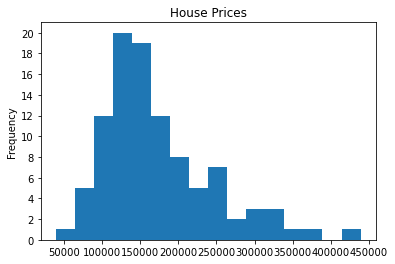

In [331]:
df["SalePrice"].plot(kind="hist", bins=16, yticks=range(0,22,2), title="House Prices", xlabel="USD")

#### Plotting Other Variables
As shown in the diagram below, only three of the initial list are numeric attributes. *Based on this exploration, we are able to determine that a more analytical approach is required to better understand the variables impacting house prices*.

<AxesSubplot:title={'center':'Quality and Condition'}, ylabel='Frequency'>

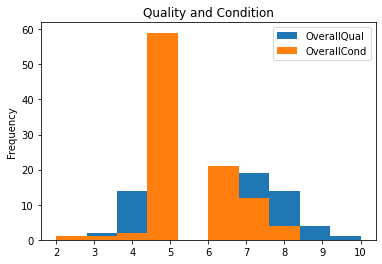

In [332]:
df[["OverallQual", "OverallCond"]].plot(kind="hist", bins=10, title="Quality and Condition", xlabel="USD")

<AxesSubplot:title={'center':'Build Year'}, ylabel='Frequency'>

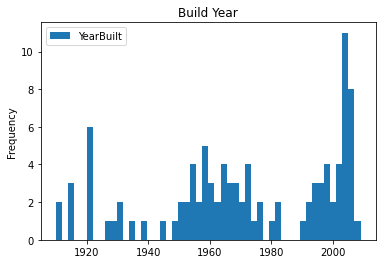

In [333]:
df[["YearBuilt"]].plot(kind="hist", bins=50, title="Build Year", xlabel="USD")

[Back to top](#Index)

### 2.3 Data Preparation
We now begin using a more organized and mathematical approch to addressing the problem at hand.

#### Null Entries
We inspect the initial data for null entries and assess how many null entries are in each column. As shown below, the data has a significant number of null values that requires cleaning before effective analysis may be performed.

In [405]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
nulls

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
FireplaceQu,54
...,...
MasVnrType,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


We then create a new Data Frame, *data*, that holds the cleaned data with the null entries removed. As shown below, the new data only has 39 columns as opposed to 82. It is important to understand that we chose to drop *columns* instead of rows because every row has at least one null value, and so using the *dropna()* along axis=0 would eliminate all of our rows. We therefore choose to eliminate columns that have null data.

In [335]:
data = df.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(data.isnull().sum() != 0)
data.shape

(100, 39)

Another crucial step is realizing that we should work with numeric data and select it from the *data* Data Frame and creating a new structure called *numeric*. At this point, we are now ready to perform correlation analysis and build the predictive model.

In [336]:
numeric = data.select_dtypes(include=[np.number])
numeric

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,73.5,9765,6,8,1993,1993,68.0,...,232,63,0,0,0,0,480,4,2009,185000
96,96,97,20,78.0,10264,7,5,1999,1999,183.0,...,158,29,0,0,0,0,0,8,2006,214000
97,97,98,20,73.0,10921,4,5,1965,1965,48.0,...,120,0,0,0,0,0,0,5,2007,94750
98,98,99,30,85.0,10625,5,5,1920,1950,0.0,...,0,0,77,0,0,0,400,5,2010,83000


[Back to top](#Index)

### 2.4 Correlation
The correlation performed below creates a correlation matrix. This Data Frame indicates which attributes are mostly correlated with the SalePrice dependent variable. Once the Series is extracted and sorted in descending order, we can select *x* number of variables to help build our model. As an initial approach, we shall assume we want the top eight columns wit hthe highest correlation coefficients.

Based on these findings, it is even more clear that our hypothesis presented earlier was not effective and that only OverallQual and YearBuilt had the most significant impact on the SalePrice variable.

The columns that we ought to proceed with are detailed below, and we are using 8 to satisfy the task at hand, currently. Furthermore, we are repeating the process to deal with situations where other sets of variables are used to understand the impact on model score.

In [337]:
corr = numeric.corr()

#### Case 1 - 2 Variables

In [361]:
cols1 = corr["SalePrice"].sort_values(ascending=False)[0:3].index
X1 = data[cols1]
Y1 = X1["SalePrice"]
X1 = X1.drop(["SalePrice"], axis=1)
cols1

Index(['SalePrice', 'OverallQual', 'GrLivArea'], dtype='object')

#### Case 2 - 5 Variables

In [362]:
corr = numeric.corr()
cols2 = corr["SalePrice"].sort_values(ascending=False)[0:6].index
X2 = data[cols2]
Y2 = X2["SalePrice"]
X2 = X2.drop(["SalePrice"], axis=1)
cols2

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt'],
      dtype='object')

#### Case 3 - 8 Variables

In [363]:
corr = numeric.corr()
cols3 = corr["SalePrice"].sort_values(ascending=False)[0:9].index
X3 = data[cols3]
Y3 = X3["SalePrice"]
X3 = X3.drop(["SalePrice"], axis=1)
cols3

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath'],
      dtype='object')


[Back to top](#Index)

## 3. Project Description
The analysis presented below builds on the one performed by Dr. Williams by including additional variables in the analysis. They were determined by pulling in the next 3 columns from the correlation columns Series, as detailed earlier. The decision to select the variables was soley due to their corresponding correlation coefficient values with respect to SalePrice.

[Back to top](#Index)

### 3.1 Linear Regression

The main approach used in this project is that of Linear Regression. More specifically, we use multvariable linear regression to predict the value of a dependent varialbe by applying weights to more than one independent variable. A common formula is:

[SOURCE 1](https://en.wikipedia.org/wiki/Linear_regression)

The process to complete such an analysis in Python is to do the following:
1. Import *linear_model* from *sklearn*
2. Create a Linear Regression object
3. Create the model with predefined X and Y values
4. Evaluate the accuracy or *score* of the model.

These steps are detailed in the following sections.

[Back to top](#Index)

### 3.2 Analysis 

In [364]:
# Build Linear Regression
from sklearn import linear_model
lr = linear_model.LinearRegression()

#### Case 1 Linear Regression

In [380]:
model_case1 = lr.fit(X1,Y1)
predictions_case1 = model_case1.predict(X1)
score1 = model_case1.score(X=X1,y=Y1)

#### Case 2 Linear Regression

In [379]:
model_case2 = lr.fit(X2,Y2)
predictions_case2 = model_case2.predict(X2)
score2 = model_case2.score(X=X2,y=Y2)

#### Case 3 Linear Regression

In [378]:
model_case3 = lr.fit(X3,Y3)
predictions_case3 = model_case3.predict(X3)
score3 = model_case1.score(X=X3,y=Y3)

[Back to top](#Index)

### 3.3 Results

From this experimentation, it is found that the model's score increased as we increased the number of variables in the linear regression model. **Therefore, the best model was that of Case 3 which included 8 variables in the linear regression.**

[0.7776370735872411, 0.8309859964337734, 0.8508305344209256]

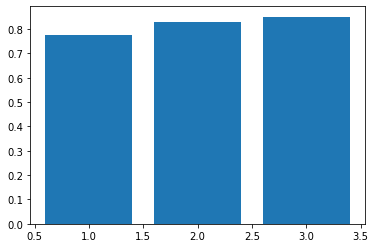

In [402]:
# Plotting Scores to graphically understand effectiveness
scores = [score1, score2, score3]
plt.bar(x=[1,2,3],height=scores)
scores

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

By using the best model against the provided test data, we were able to score more than 85%. This rivals the score attained earlier and shows that the model is effective with new data as well.

In [403]:
df1 = pd.read_csv("jtest.csv")
df1

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,195,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
96,196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872
97,197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
98,198,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000


In [407]:
nulls1 = pd.DataFrame(df.isnull().sum().sort_values(ascending=False))
nulls1

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
FireplaceQu,54
...,...
MasVnrType,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


In [408]:
data1 = df1.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(data1.isnull().sum() != 0)
data1.shape

(100, 38)

In [409]:
X4 = data[cols3]
Y4 = X4["SalePrice"]
X4 = X4.drop(["SalePrice"], axis=1)

In [411]:
model_case4 = lr.fit(X4,Y4)
predictions_case4 = model_case4.predict(X4)
score4 = model_case4.score(X=X4,y=Y4)
score4

0.8508305344209256

[Back to top](#Index)

## Conclusion

The main takeaway from the project is that as we increase the number of *correlating* variables in a linear regression, the more effective and accurate it becomes in mapping provided and external data. The model developed contains 8 variables and predicts house sale price with a score of approximately 85%.



[Back to top](#Index
)
## References

- “Linear regression.” Wikipedia. https://en.wikipedia.org/wiki/Linear_regression.
